In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [12]:
#Import dataframes 

df_player_stats = pd.read_csv('DataFiles/player_stats.csv')
df_bio = pd.read_csv('DataFiles/df_bio.csv')
data_index = pd.read_csv('DataFiles/data_index.csv')

In [13]:
columns_to_delete = ['PLUS_MINUS', 'NBA_FANTASY_PTS', 'DD2', 'TD3', 'WNBA_FANTASY_PTS', 'GP_RANK',
                     'W_RANK', 'L_RANK', 'W_PCT_RANK', 'MIN_RANK', 'FGM_RANK', 'FGA_RANK',
                     'FG_PCT_RANK', 'FG3M_RANK', 'FG3A_RANK', 'FG3_PCT_RANK', 'FTM_RANK',
                     'FTA_RANK', 'FT_PCT_RANK', 'OREB_RANK', 'DREB_RANK', 'REB_RANK',
                     'AST_RANK', 'TOV_RANK', 'STL_RANK', 'BLK_RANK', 'BLKA_RANK', 'PF_RANK',
                     'PFD_RANK', 'PTS_RANK', 'PLUS_MINUS_RANK', 'NBA_FANTASY_PTS_RANK',
                     'DD2_RANK', 'TD3_RANK', 'WNBA_FANTASY_PTS_RANK']
# Delete the specified columns
df_player_stats.drop(columns=columns_to_delete, inplace=True, errors='ignore')

df_player_stats.rename(columns={'Season_type': 'Season'}, inplace=True)

In [16]:
# Columns to be dropped in 'df_bio' table:
df_bio.drop(columns=['PLAYER_HEIGHT', 'PLAYER_HEIGHT_INCHES', 'PLAYER_WEIGHT', 'PTS', 'REB', 'AST'], inplace=True, errors='ignore')

In [ ]:
# Merge 'df_player_stats' and ‘df_bio‘ on common keys ‘PLAYER_ID‘ and ‘Year‘ in order to get 'COUNTRY' column.
merged_df_stats_bio = pd.merge(df_player_stats, df_bio, on=['PLAYER_ID', 'Year', 'Season'], how='inner')

columns_to_delete_merged = ['GP_y','PTS_y','REB_y','AST_y','NET_RATING','OREB_PCT','DREB_PCT','USG_PCT', 'TS_PCT','AST_PCT']

merged_df_stats_bio.drop(columns=columns_to_delete_merged, inplace=True) 

In [18]:
# Checking the result of 'merged_df_stats_bio'
merged_df_stats_bio.shape

(18282, 49)

In [19]:
# Merging 'merged_df_stat_bio' with player index table on player-id to get player´s role/position.
final_merged_df = pd.merge(merged_df_stats_bio, data_index, left_on='PLAYER_ID', right_on='PERSON_ID', how='inner')

# Dropping all duplicate columns with trailing letter 'y'.
columns_to_drop = [col for col in final_merged_df.columns if 'y' in col]
final_merged_df.drop(columns=columns_to_drop, inplace=True)

# Dropping redundant columns
columns_to_drop_2 = [
    'PLAYER_LAST_NAME',
    'PLAYER_FIRST_NAME',
    'PLAYER_SLUG',
    'TEAM_ID',
    'TEAM_SLUG',
    'IS_DEFUNCT',
    'TEAM_NAME',
    'NICKNAME',
    'TEAM_ABBREVIATION',
    'ROSTER_STATUS',
    'STATS_TIMEFRAME', 
    'PERSON_ID',
    'TEAM_CITY'
]

final_merged_df.drop(columns=columns_to_drop_2, inplace=True)

In [20]:
# Drop '_x' at the end of column names 
for column in final_merged_df.columns: 
    if '_x' in column: 
        column_name = column.replace('_x', '')
        final_merged_df.rename(columns={column:column_name}, inplace=True)

# Change regular season name at 'Season' column  
final_merged_df['Season'] = final_merged_df['Season'].apply(lambda x:'Regular Season' if x =='Regular%20Season' else x)

final_merged_df

,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,Year,Season,COLLEGE,COUNTRY,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,NET_RATING,OREB_PCT,DREB_PCT,USG_PCT,TS_PCT,AST_PCT,JERSEY_NUMBER,POSITION,HEIGHT,WEIGHT,FROM_YEAR,TO_YEAR
0,920,A.C. Green,1610612742,DAL,33.0,83,23,60,0.277,30.1,2.8,5.8,0.483,0.0,0.2,0.050,1.5,2.4,0.650,2.7,5.2,7.9,0.8,0.9,0.8,0.2,0.5,1.7,0.0,7.2,1996-97,Regular Season,Oregon State,USA,1985,1,23,-7.4,0.089,0.184,0.118,0.523,0.045,45,F,6-9,225.0,1985,2000
1,920,A.C. Green,1610612742,DAL,34.0,82,20,62,0.244,32.3,3.0,6.5,0.453,0.0,0.0,0.000,1.4,2.0,0.716,2.7,5.5,8.1,1.5,0.8,1.0,0.3,0.4,1.9,0.0,7.3,1997-98,Regular Season,Oregon State,USA,1985,1,23,-7.3,0.081,0.173,0.116,0.496,0.074,45,F,6-9,225.0,1985,2000
2,920,A.C. Green,1610612742,DAL,35.0,50,19,31,0.380,18.5,2.2,5.1,0.422,0.0,0.2,0.000,0.6,1.0,0.577,1.6,2.9,4.6,0.5,0.4,0.6,0.2,0.3,1.4,0.0,4.9,1998-99,Regular Season,Oregon State,USA,1985,1,23,-5.0,0.086,0.163,0.144,0.441,0.043,45,F,6-9,225.0,1985,2000
3,920,A.C. Green,1610612747,LAL,36.0,82,67,15,0.817,23.5,2.1,4.7,0.447,0.0,0.0,0.250,0.8,1.2,0.695,2.0,4.0,5.9,1.0,0.6,0.6,0.2,0.3,1.5,0.2,5.0,1999-00,Regular Season,Oregon State,USA,1985,1,23,8.3,0.080,0.160,0.110,0.482,0.058,45,F,6-9,225.0,1985,2000
4,920,A.C. Green,1610612747,LAL,36.0,23,15,8,0.652,18.7,1.6,3.9,0.411,0.0,0.0,0.000,0.7,1.0,0.696,1.9,2.3,4.2,0.6,0.4,0.6,0.1,0.2,1.9,0.1,3.9,1999-00,Playoffs,Oregon State,USA,1985,1,23,-3.9,0.095,0.126,0.115,0.449,0.044,45,F,6-9,225.0,1985,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18277,1631246,Vince Williams Jr.,1610612763,MEM,22.0,15,7,8,0.467,7.0,0.8,2.7,0.300,0.3,1.9,0.143,0.1,0.1,1.000,0.3,0.7,1.0,0.3,0.3,0.4,0.1,0.1,0.8,0.2,2.0,2022-23,Regular Season,Virginia Commonwealth,USA,2022,2,47,-14.8,0.030,0.120,0.176,0.367,0.062,5,G,6-4,205.0,2022,2023
18278,1631117,Walker Kessler,1610612762,UTA,21.0,74,34,40,0.459,23.0,4.0,5.6,0.720,0.0,0.0,0.333,1.1,2.1,0.516,3.1,5.3,8.4,0.9,0.8,0.4,2.3,0.5,2.3,1.7,9.2,2022-23,Regular Season,Auburn,USA,2022,1,22,3.0,0.133,0.205,0.130,0.702,0.057,24,C,7-0,245.0,2022,2023
18279,1631111,Wendell Moore Jr.,1610612750,MIN,21.0,29,16,13,0.552,5.3,0.6,1.5,0.419,0.1,0.6,0.118,0.1,0.2,0.800,0.1,0.5,0.6,0.6,0.3,0.3,0.2,0.1,0.4,0.2,1.4,2022-23,Regular Season,Duke,USA,2022,1,26,-13.5,0.025,0.086,0.139,0.465,0.162,7,G,6-5,215.0,2022,2023
18280,1631111,Wendell Moore Jr.,1610612750,MIN,21.0,1,0,1,0.000,2.1,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-23,Playoffs,Duke,USA,2022,1,26,20.0,0.000,0.000,0.200,0.000,0.000,7,G,6-5,215.0,2022,2023


In [21]:
# European countries in basketball sense
europe = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'Denmark',
  'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland',
  'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands',
  'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 
  'United Kingdom', 'Norway', 'Switzerland', 'Belarus', 'Russia', 'Ukraine',
  'Moldova', 'Georgia', 'Armenia', 'Azerbaijan', 'Turkey', 'Israel', 'Albania',
  'Macedonia', 'Serbia', 'Montenegro', 'Bosnia and Herzegovina', 'Iceland']

In [ ]:
# Function to filer on countries
def filter_non_europe(df, column_name='', country_list=europe):
    return df[~df[column_name].isin(europe)]

# New object df for European players only
usa_others_df = filter_non_europe(final_merged_df, 'COUNTRY')
usa_others_df.head(10)

In [ ]:
# Function to filer on countries
def filter_europe(df, column_name='', country_list=europe):
    return df[df[column_name].isin(europe)]

# New object df for European players only
europe_df = filter_europe(final_merged_df, 'COUNTRY')
europe_df

In [31]:

player_ppg = usa_others_df.groupby('PLAYER_NAME').agg({
    'PTS': 'mean',              # Mean PPG
    'GP': 'sum'        # Sum of total games played
}).reset_index()
# Sort the player_stats dataframe by PPG in descending order and get the top 20 players
ppg_others_players = player_ppg.sort_values(by='PTS', ascending=False).head(10)

ppg_others_players

,PLAYER_NAME,PTS,GP
1318,Kevin Durant,28.103704,1152
1408,LeBron James,27.733333,1703
1598,Michael Jordan,27.450000,346
59,Allen Iverson,26.940909,985
637,Donovan Mitchell,26.000000,457
1137,Joel Embiid,25.600000,447
456,Damian Lillard,25.436842,830
595,Devin Booker,25.318182,573
2131,Trae Young,25.250000,380
2297,Zion Williamson,25.166667,114


In [ ]:
# Grouping players by name and calculating the average PPG across all seasons
# player_stats = europe_df.groupby('PLAYER_NAME')['PTS'].mean().reset_index()
player_ppg = europe_df.groupby('PLAYER_NAME').agg({
    'PTS': 'mean',              # Mean PPG
    'GP': 'sum'        # Sum of total games played
}).reset_index()
# Sort the player_stats dataframe by PPG in descending order and get the top 20 players
ppg_euro_players = player_ppg.sort_values(by='PTS', ascending=False).head(10)

ppg_euro_players

In [ ]:
# Data preparation
usa_players = ppg_others_players['PLAYER_NAME']
usa_ppg = ppg_others_players['PTS']
usa_gp = ppg_others_players['GP']
euro_players = ppg_euro_players['PLAYER_NAME']
euro_ppg = ppg_euro_players['PTS']
euro_gp = ppg_euro_players['GP']

# Plotting
plt.figure(figsize=(16, 8))

usa_bars = plt.barh(usa_players, usa_ppg, color='blue', label='USA Players')
euro_bars = plt.barh(euro_players, euro_ppg, color='green', label='European Players')

plt.xlabel('Average Points Per Game (PPG)')
plt.ylabel('Players')
plt.title('Top 10 Players by Average Points Per Game')
plt.legend()

plt.gca().invert_yaxis()  # Invert y-axis to display the player with the highest PPG at the top

# Annotating bars with total number of games played
for bar, gp in zip(usa_bars, usa_gp):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'GP: {gp}', va='center')

for bar, gp in zip(euro_bars, euro_gp):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'GP: {gp}', va='center')

plt.show()


In [49]:
# Grouping players by name and calculating the SUM PPG across all seasons
player_stats = europe_df.groupby('PLAYER_NAME')['PTS'].sum().reset_index()

# Sort the player_stats dataframe by PPG in descending order and get the top 20 players
ppg_euro_players = player_stats.sort_values(by='PTS', ascending=False).head(10)

ppg_euro_players


,PLAYER_NAME,PTS
50,Dirk Nowitzki,791.9
216,Tony Parker,574.3
170,Pau Gasol,480.7
75,Giannis Antetokounmpo,431.9
173,Peja Stojakovic,368.2
121,Luol Deng,310.9
154,Nikola Jokic,303.5
123,Marc Gasol,302.5
78,Goran Dragic,282.0
41,Danilo Gallinari,279.7


In [50]:
# Grouping players by name and calculating the SUM PPG across all seasons
player_stats = usa_others_df.groupby('PLAYER_NAME')['PTS'].sum().reset_index()

# Sort the player_stats dataframe by PPG in descending order and get the top 20 players
ppg_others_players = player_stats.sort_values(by='PTS', ascending=False).head(10)

ppg_others_players

,PLAYER_NAME,PTS
1408,LeBron James,998.4
1352,Kobe Bryant,857.4
1318,Kevin Durant,758.8
2092,Tim Duncan,720.5
298,Carmelo Anthony,702.6
980,James Harden,665.4
671,Dwyane Wade,642.9
1977,Shaquille O'Neal,634.6
1904,Russell Westbrook,631.3
373,Chris Paul,623.8


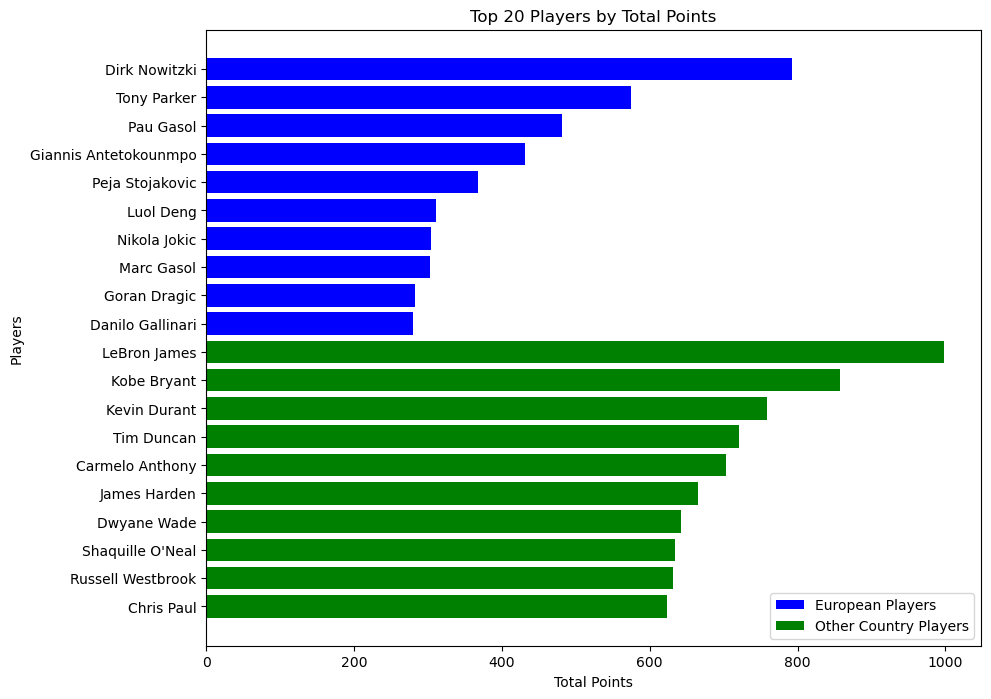

In [54]:

# Data preparation for European players
euro_players = ppg_euro_players['PLAYER_NAME']
euro_pts = ppg_euro_players['PTS']

# Data preparation for USA and other country players
others_players = ppg_others_players['PLAYER_NAME']
others_pts = ppg_others_players['PTS']

# Plotting
plt.figure(figsize=(10, 8))

plt.barh(euro_players, euro_pts, color='blue', label='European Players')
plt.barh(others_players, others_pts, color='green', label='Other Country Players')

plt.xlabel('Total Points')
plt.ylabel('Players')
plt.title('Top 20 Players by Total Points')
plt.legend()

plt.gca().invert_yaxis()  # Invert y-axis to display the player with the highest total points at the top

plt.show()


In [55]:
# Data preparation for European players
euro_players = ppg_euro_players['PLAYER_NAME']
euro_pts = ppg_euro_players['PTS']
euro_gp = ppg_euro_players['GP']

# Data preparation for USA and other country players
others_players = ppg_others_players['PLAYER_NAME']
others_pts = ppg_others_players['PTS']
others_gp = ppg_others_players['GP']

# Plotting
plt.figure(figsize=(10, 8))

euro_bars = plt.barh(euro_players, euro_pts, color='blue', label='European Players')
others_bars = plt.barh(others_players, others_pts, color='green', label='Other Country Players')

plt.xlabel('Total Points')
plt.ylabel('Players')
plt.title('Top 20 Players by Total Points')
plt.legend()

plt.gca().invert_yaxis()  # Invert y-axis to display the player with the highest total points at the top

# Annotating bars with total points and total games played
for bar, pts, gp in zip(euro_bars, euro_pts, euro_gp):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'Total Points: {pts}, Total GP: {gp}', va='center')

for bar, pts, gp in zip(others_bars, others_pts, others_gp):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'Total Points: {pts}, Total GP: {gp}', va='center')

plt.show()


KeyError: 'GP'